<BarContainer object of 9 artists>

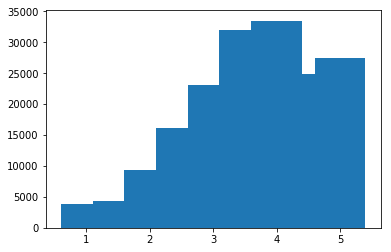

In [7]:
from pyspark import SparkConf, SparkContext
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import findspark
findspark.init()
% matplotlib inline

input = sc.textFile("file:///Users/yashparikh/Project/dataset/business.json")
data_lines = input.map(lambda x: json.loads(x))
stars = data_lines.map(lambda x: (x["stars"], 1))
count_stars = stars.reduceByKey(lambda x,y: x+y).collectAsMap() #this is a dictionary

# for s,v in count_stars.items():
#     print "star", s
#     print "values", v

keys = count_stars.keys()
values = count_stars.values()
df = pd.DataFrame(list(zip(keys,values)), columns=['stars','counts'])
fig, axs = plt.subplots(1)
axs.bar(keys, values)